In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.detector_factory import (
    DetectorFactoryInterface,
    DetectorType,
)
from segmenter_api.domain.service.detector import Text2BboxInput
from segmenter_api.utils.image import draw_bbox

In [3]:
detector_factory = resolve(DetectorFactoryInterface)

In [4]:
detector = detector_factory.create(DetectorType.FLORENCE2)

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/.venv/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [5]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path)

In [6]:
text2bbox_output = detector.text2bbox(
    Text2BboxInput(texts=["plastic bottle", "green character"], image=image)
)

In [7]:
print(text2bbox_output.bboxes)

[[252.416015625, 186.8800048828125, 518.656005859375, 740.864013671875], [295.42401123046875, 542.2080078125, 501.2480163574219, 733.696044921875]]


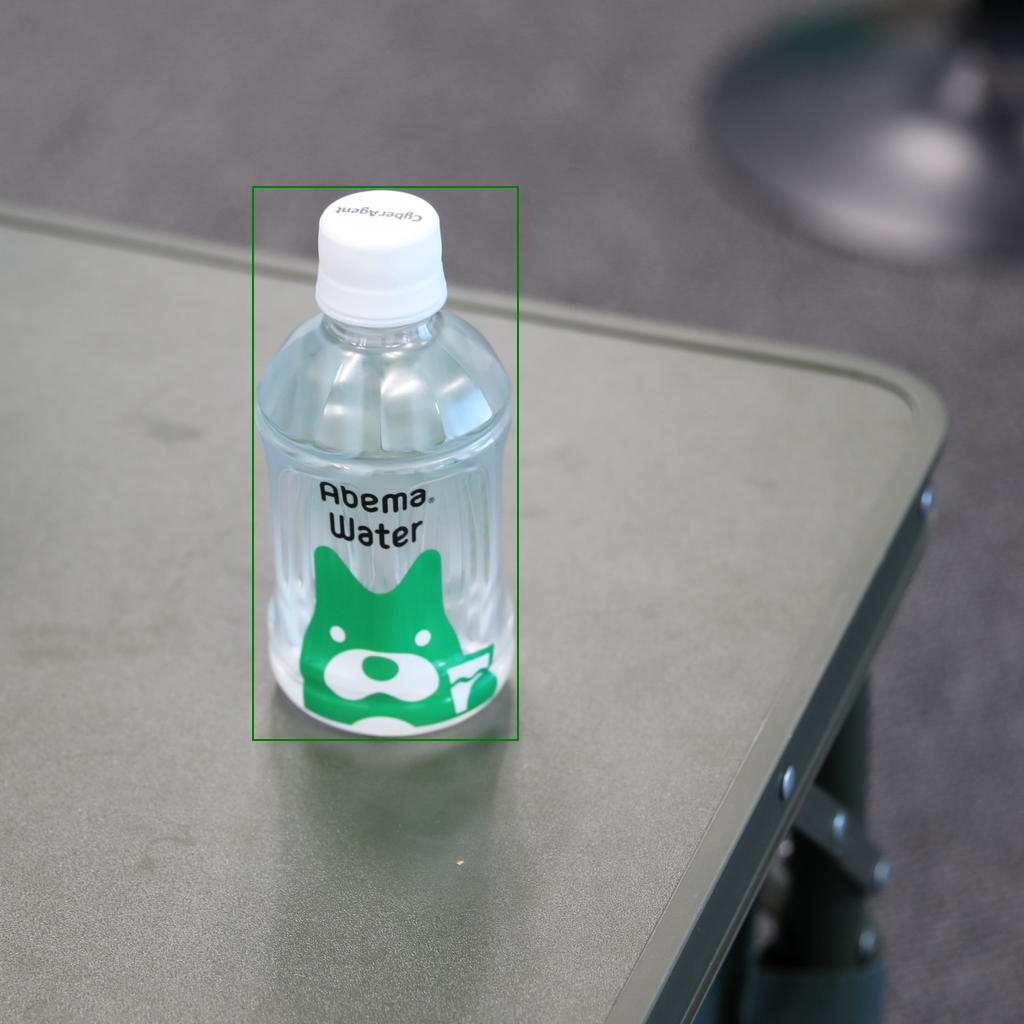

In [8]:
draw_bbox(image=image, bbox=text2bbox_output.bboxes[0])

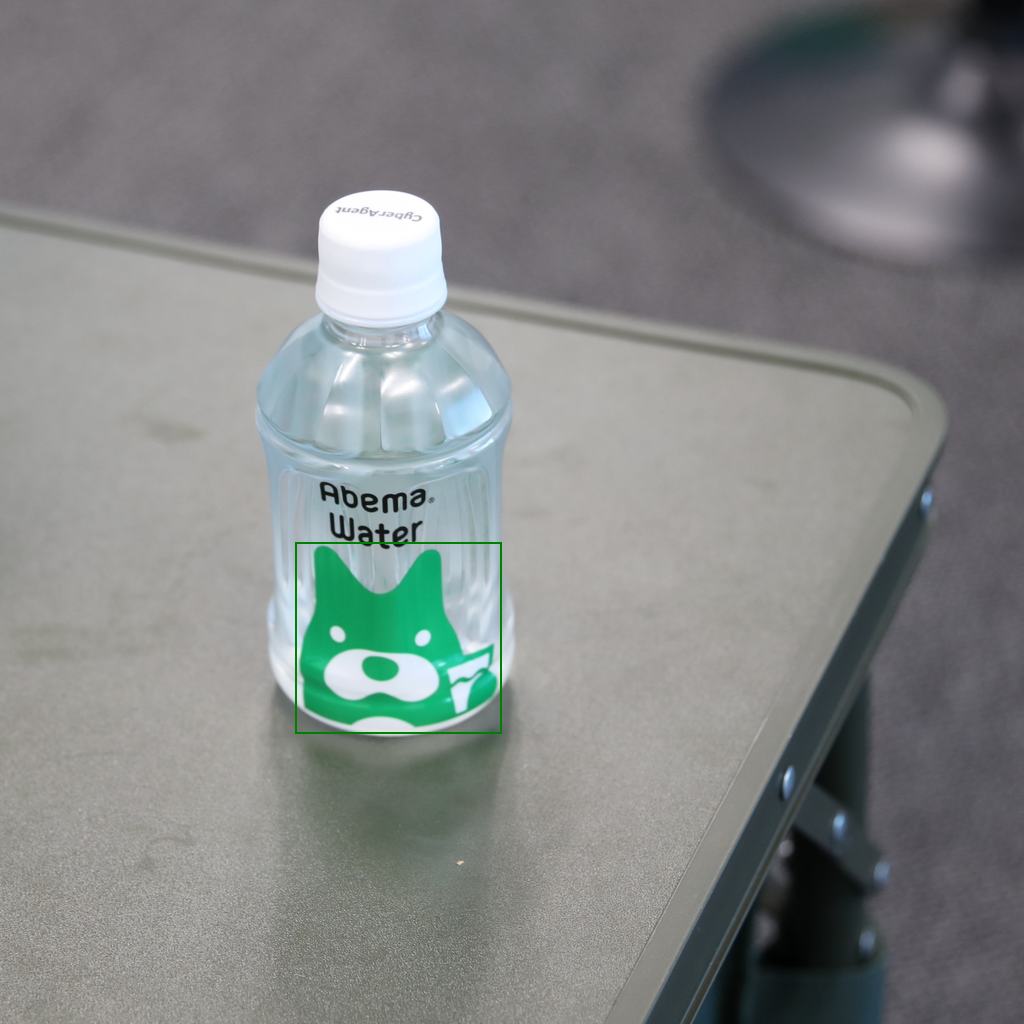

In [9]:
draw_bbox(image=image, bbox=text2bbox_output.bboxes[1])